In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

import pickle
import sys
sys.path.append('../')
sys.path.append('../usecase_rb')
sys.path.append('../src')
import src
import simulation

plt.style.use("seaborn-v0_8-paper")

font = 14
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.size': font,
    'axes.labelsize': font,  
    'xtick.labelsize': font,  
    'ytick.labelsize': font, 
    'legend.fontsize': font,
    'legend.title_fontsize': font,
    'axes.titlesize': font
})
import warnings
warnings.filterwarnings("ignore")

In [85]:
from paretoset import paretoset
import pickle

In [86]:
import utils 

PARETO SOLUTIONS OF A RANDOM SAMPLE SET

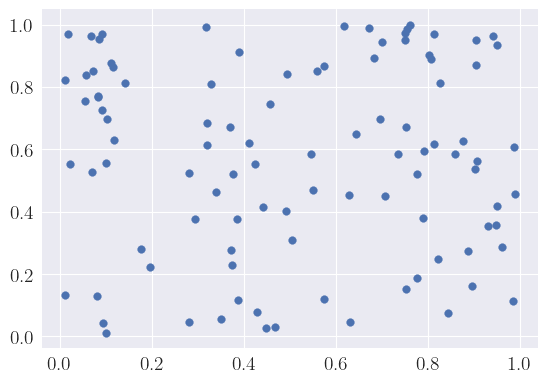

In [87]:
a = 0
b = 1
sample = (b-a) * np.random.random_sample((2,100)) + a
plt.scatter(x=sample[0], y=sample[1])
plt.show()

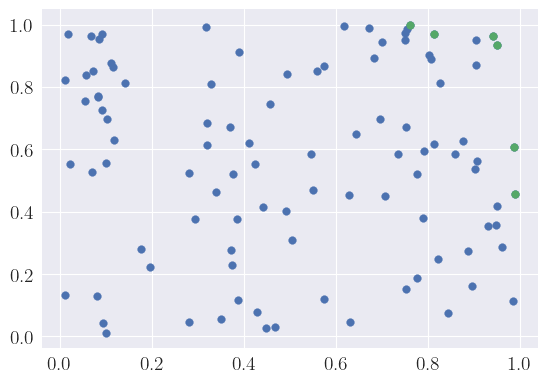

In [88]:
filter = paretoset(sample.T, sense=["max", "max"])

plt.scatter(x=sample[0], y=sample[1])
plt.scatter(x=sample[0][filter], y=sample[1][filter])
plt.show()

LEMMA:

Assuming there is a pareto optimal set of maximization obejctives, then the solution which has the maximum mean over all objectives is always part of the pareto optimal set.


PROOF:

 A set associated with the maximum mean is in the pareto set. Assume that the maximum mean $\overline{x}_{max}$ is not part of the pareto optimal set, then there is to find an increment $\Delta x$, such that $\overline{x}_{\Delta} = \frac{(x_1+\Delta x) + x_2 ... + x_n}{n}$ in the set; this is a contradiction, since it would imply $\overline{x}_{\Delta} > \overline{x}_{max}$.

PARETO SAMPLES IN TRAINING DATA 2x2

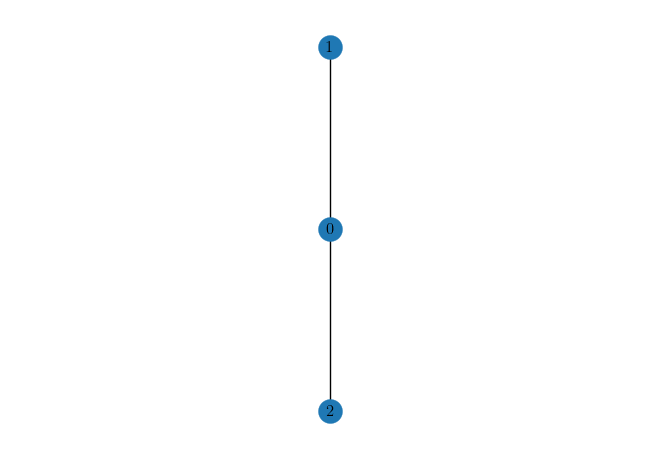

In [89]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

T = nx.balanced_tree(2, 1)

pos = graphviz_layout(T, prog="twopi")
nx.draw(T, pos, with_labels=True)
plt.show()

In [90]:
with open('../../surdata/SU_tree2,1_0.50h_objective-meanopt_SEED42_03-28-2024_16:51:58.pkl', 'rb') as file: 
    # Load the object from the file
    sur_loaded_data = pickle.load(file)
model = sur_loaded_data

In [92]:
import random
from itertools import combinations, groupby
def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if np.random.random() < p:
                G.add_edge(*e)
    return G

nodes = 40
seed = 42
probability = 0.001
G = gnp_random_connected_graph(nodes,probability)

plt.figure(figsize=(10,6))

nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)


TypeError: object of type 'itertools._grouper' has no len()

In [94]:
model.vals

{'protocol': 'ndsrs',
 'p_gen': 0.9,
 'p_swap': 1,
 'return_data': 'avg',
 'progress_bar': None,
 'total_time': 1000,
 'N_samples': 1000,
 'p_cons': 0.225,
 'qbits_per_channel': 5,
 'cutoff': 28,
 'M': 2,
 'A': array([[0, 1, 1],
        [1, 0, 0],
        [1, 0, 0]])}

In [95]:
# set cutoff time
T = 2000
M = 4
Fnew = 0.888
Fapp = 0.6
-T*np.log( 3/(4*Fnew-1) * ((4*Fapp-1)/3)**(1/M) )

57.600179652315944

In [96]:
virtual_neighbours = pd.DataFrame(model.y) # N = 1000
virtual_neighbours.columns = [f'node {i}' for i in range(3)]
virtual_neighbours = virtual_neighbours[['node 0', 'node 1', 'node 2']]
virtual_neighbours

,node 0,node 1,node 2
0,0.243243,1.123123,1.120120
1,0.978979,1.464464,1.470470
2,0.162162,1.085085,1.077077
3,0.380380,1.188188,1.190190
4,1.993994,1.302302,1.302302
...,...,...,...
225,1.872873,1.636637,1.645646
226,1.858859,1.603604,1.594595
227,1.872873,1.636637,1.645646
228,1.872873,1.636637,1.645646


In [97]:
virtual_neighbours.sum(axis=1)

0      2.486486
1      3.913914
2      2.324324
3      2.758759
4      4.598599
         ...   
225    5.155155
226    5.057057
227    5.155155
228    5.155155
229    5.105105
Length: 230, dtype: float64

In [98]:
vn = virtual_neighbours.to_numpy()

In [99]:
filter = paretoset(vn, sense=["max"]*3)

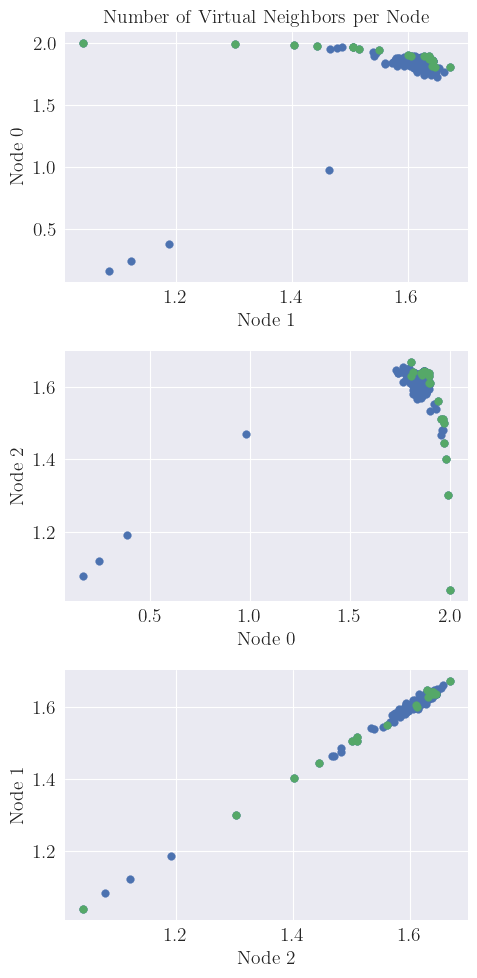

In [100]:
fig, axs = plt.subplots(3,sharey=False, sharex=False, figsize=[5,10])
labels = [1,0,2,1]
for i,ax in enumerate(axs):
    ax.scatter(x=vn[:,labels[i]], y=vn[:,labels[i+1]])
    ax.scatter(x=vn[:,labels[i]][filter], y=vn[:,labels[i+1]][filter])
    ax.set_xlabel(f'Node {labels[i]}')
    ax.set_ylabel(f'Node {labels[i+1]}')
axs[0].set_title('Number of Virtual Neighbors per Node')
plt.tight_layout()
plt.show()

In [101]:
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
virtual_neighbours['filter'] = filter
fig = px.scatter_3d(virtual_neighbours, x=virtual_neighbours.columns[0], y=virtual_neighbours.columns[1], z=virtual_neighbours.columns[2],
              color='filter')
plt.tight_layout()
fig.show()

<Figure size 640x440 with 0 Axes>

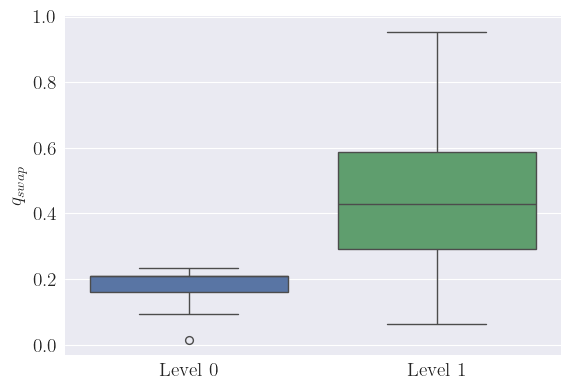

In [102]:
fig, ax = plt.subplots()
g = sns.boxplot(model.X_df[filter].drop(['Iteration'], axis=1))
g.set_xticklabels(['Level 0', 'Level 1'])
plt.ylabel(r'$q_{swap}$')
plt.show()

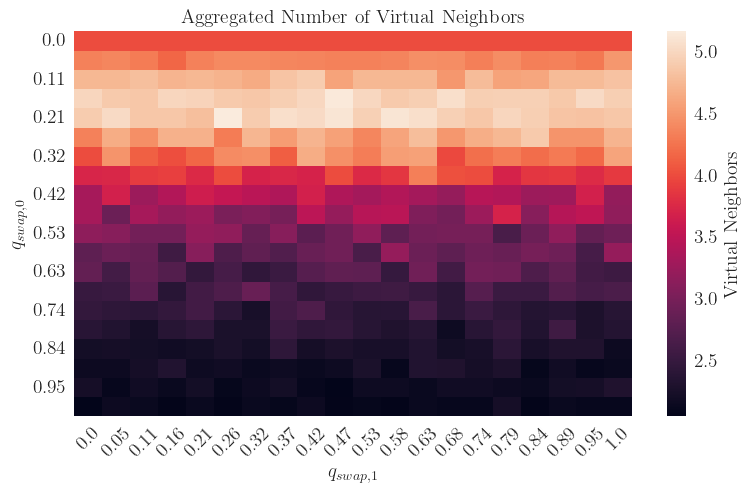

In [103]:
df_plot = pd.read_pickle('../usecase_cd/21tree-heatmap.pkl')
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df_plot, cbar_kws={'label': 'Virtual Neighbors'})
plt.xlabel(r'$q_{swap,1}$')
plt.ylabel(r'$q_{swap,0}$')
plt.yticks(rotation=0) 
plt.xticks(rotation=45) 
plt.title('Aggregated Number of Virtual Neighbors')
plt.show()

<div style="max-width:400px;margin-left: auto; margin-right: 0